<a href="https://colab.research.google.com/github/Katurichandrika/22KN1A6141/blob/main/women_health_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

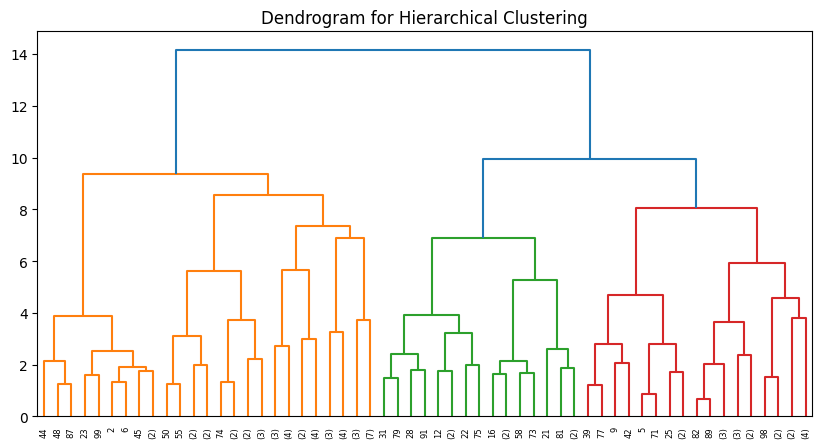

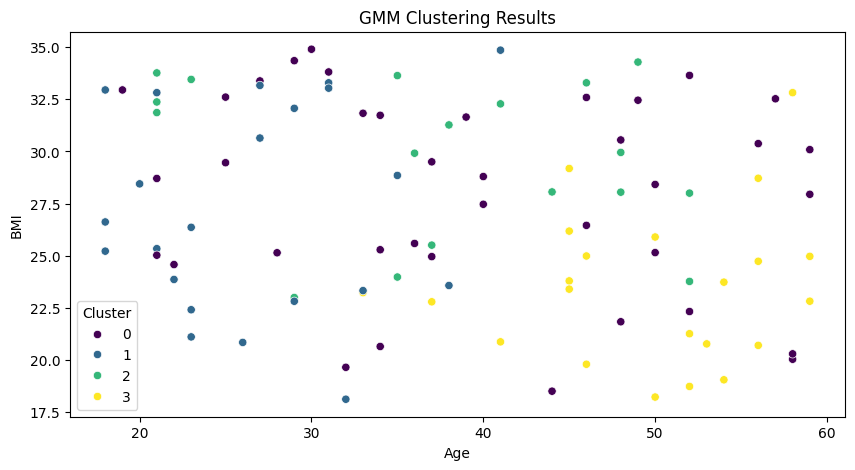

   Age        BMI  Chronic_Conditions  Exercise_Frequency  \
0   48  29.952413                   2                   3   
1   38  23.564558                   0                   6   
2   41  32.283451                   4                   0   
3   50  28.415188                   0                   4   
4   46  24.980942                   3                   4   
5   22  23.854746                   0                   5   
6   52  27.998399                   4                   0   
7   40  28.794080                   1                   0   
8   21  33.768923                   1                   2   
9   21  25.332720                   4                   5   

   Mental_Health_Score  Healthcare_Accessibility  HC_Cluster  GMM_Cluster  \
0             7.330718                  4.942226           2            2   
1             3.852072                  1.525502           4            1   
2             5.812486                  3.501572           1            2   
3             6.2706

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture

# Step 1: Load Dataset (Simulated Example)
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),
    'BMI': np.random.uniform(18, 35, 100),
    'Chronic_Conditions': np.random.randint(0, 5, 100),
    'Exercise_Frequency': np.random.randint(0, 7, 100),
    'Mental_Health_Score': np.random.uniform(1, 10, 100),
    'Healthcare_Accessibility': np.random.uniform(1, 5, 100)
})

# Step 2: Data Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Hierarchical Clustering
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Choose optimal cluster count from dendrogram
num_clusters = 4
hc_labels = fcluster(linked, num_clusters, criterion='maxclust')

data['HC_Cluster'] = hc_labels

# Step 4: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

data['GMM_Cluster'] = gmm_labels

# Step 5: Visualizing Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Age'], y=data['BMI'], hue=data['GMM_Cluster'], palette='viridis')
plt.title('GMM Clustering Results')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()

# Step 6: Generating Personalized Recommendations
def recommend_healthcare(cluster_id):
    recommendations = {
        0: 'Focus on cardiovascular health, balanced diet, and stress management.',
        1: 'Increase physical activity and monitor mental health regularly.',
        2: 'Prenatal care & gynecological support needed.',
        3: 'Preventive screenings & lifestyle modifications for chronic conditions.'
    }
    return recommendations.get(cluster_id, 'General healthcare recommendations.')

# Assigning Recommendations
data['Healthcare_Recommendation'] = data['GMM_Cluster'].apply(recommend_healthcare)

# Display Final Segmented Data
print(data.head(10))
